In [37]:
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON

# Data Visuals Packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager
from dateutil import parser

#NLP (Natural Language Processing)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\stale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
api_key = 'xxxxx'

In [5]:
channel_ids = ['UCJQJAI7IjbLcpsjWdSzYz0Q' , 
              # you can add more channels here, 
              ] 

In [6]:
api_service_name = "youtube"
api_version = "v3"
   
# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [7]:
def get_channel_stats(youtube, channel_ids):

 # Get channel stats ↓

    all_data = []

    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)    
        )
    response = request.execute()

    #loop through items

    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
               'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
               'totalViews': item['statistics']['videoCount'],
               'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
               }
        all_data.append(data)
        return(pd.DataFrame(all_data))

In [8]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [9]:
channel_stats

,channelName,subscribers,views,totalViews,playlistId
0,Thu Vu data analytics,257000,8754364,88,UUJQJAI7IjbLcpsjWdSzYz0Q


In [10]:
playlist_id = 'UUJQJAI7IjbLcpsjWdSzYz0Q'

In [28]:
#Get video Ids
video_ids = get_video_ids(youtube, playlist_id)

In [29]:
len(video_ids)

88

In [30]:
#Get video details
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,iuO2D5nz_AE,Thu Vu data analytics,I Studied Data Job Trends for 24 Hours to Save...,Read the full article 👉 https://jb.gg/datalore...,"[data analytics, data science, python, data, t...",2024-07-11T14:02:33Z,206862,6598,None,257,PT13M7S,hd,false
1,St48epdRDZw,Thu Vu data analytics,How I Would Learn Python FAST in 2024 (if I co...,Learn to build complex software 👉 https://app....,"[data analytics, data science, python, data, t...",2024-06-19T15:04:05Z,260464,10252,None,227,PT12M19S,hd,false
2,2Cj2-6TrbP8,Thu Vu data analytics,How I found time for everything with a fulltim...,Check out you.com 👉 https://you.com/\nReceive ...,"[data analytics, data science, python, data, t...",2024-06-02T21:22:18Z,26566,1203,None,53,PT15M54S,hd,false
3,qwQppK3yJvM,Thu Vu data analytics,Is It Too Late To Become a Data Analyst? | Ca...,Take 20% off CareerFoundry's Data Analytics pr...,"[data analytics, data science, python, data, t...",2024-05-31T23:30:15Z,9213,335,None,17,PT48M1S,hd,false
4,nd4oG280ifg,Thu Vu data analytics,"I didn't worry about climate change, until I s...",Read the full article 👉 https://jb.gg/ppzxdp \...,"[data analytics, data science, python, data, t...",2024-04-10T21:43:31Z,4951,214,None,60,PT11M38S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,5LWoJAh-kww,Thu Vu data analytics,Data Analyst Skill Stack // How I Became A Dat...,👩🏻‍💻 My laptop and iPad for doing DS/ study 👉 ...,None,2021-06-16T10:16:47Z,33333,1794,None,70,PT10M35S,hd,false
84,_RzoHVWKwq4,Thu Vu data analytics,Effective visual note-taking on iPad + Downloa...,Hi there! In this video I’m showing you how to...,"[Note-taking, Study, iPad Pro, Visual note-tak...",2021-06-09T06:58:21Z,12939,428,None,15,PT8M19S,hd,false
85,hWKLO7GtpiU,Thu Vu data analytics,Data scientist is NOT the only SEXY job // All...,Hi there! In this video I explain different da...,None,2021-06-01T22:51:42Z,9123,295,None,20,PT14M4S,hd,false
86,dBZqggW22rs,Thu Vu data analytics,"How I take notes on iPad Pro | Notion, Notes, ...",My note-taking system tour in Notion and tips ...,"[Notes, Study, Productivity, Notion, Procreate...",2021-05-16T22:47:12Z,12209,284,None,21,PT9M7S,hd,false


In [31]:
# Get video comments

def get_comments_in_videos(youtube, video_ids):
    all_comments = []

    for video_id in video_ids:
        request = youtube.commentThreads().list(
            part='snippet,replies',
            videoId=video_id
        )
        response = request.execute()

        comments_in_video = [
            comment['snippet']['topLevelComment']['snippet']['textOriginal']
            for comment in response['items']
        ]
        comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

        all_comments.append(comments_in_video_info)

    return pd.DataFrame(all_comments)

In [32]:
comments_df = get_comments_in_videos(youtube, video_ids)

In [33]:
comments_df ['comments'] [0]

['Hey there, thank you for watching! Check out the full data report in Datalore 👉 https://jb.gg/datalore-notebook',
 'Thank you',
 'Hey Thu Vu! Do you edit videos yourself or have you hired someone? I’m an editor and would love to discuss it if you’re interested',
 'Its irresponsible to recommend Upwork',
 'just discovered you, and your explanation is wow. I have already watched a few of your videos :)',
 'Wow this is so much great information, thank you!',
 "Fully agree with SQL as indoctrinating analysts into critical ways of thinking of high volume data in terms of relational algebra.  Apart from AI/MO, even for operational research, relational algebra *is* available in 4GLs like Python, but it's far more expedient in SQL (and is the focus of SQL).  Once you have experience in the concepts and practice, you can battle the syntax and navigate the APIs of Python packages, but trying to do both can stunt progress in both.\n\nAlso fully agree that technical skills need to be complemente

In [34]:
#Check for NULL values
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [35]:
#Check data types
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [36]:
#Convert columns to numeric
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [38]:
#Publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

In [39]:
#Convert duration to seconds 
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [40]:
video_df[['durationSecs', 'duration']]

,durationSecs,duration
0,0 days 00:13:07,PT13M7S
1,0 days 00:12:19,PT12M19S
2,0 days 00:15:54,PT15M54S
3,0 days 00:48:01,PT48M1S
4,0 days 00:11:38,PT11M38S
...,...,...
83,0 days 00:10:35,PT10M35S
84,0 days 00:08:19,PT8M19S
85,0 days 00:14:04,PT14M4S
86,0 days 00:09:07,PT9M7S


In [41]:
#Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else  len(x))

In [42]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishDayName,durationSecs,tagCount
0,iuO2D5nz_AE,Thu Vu data analytics,I Studied Data Job Trends for 24 Hours to Save...,Read the full article 👉 https://jb.gg/datalore...,"[data analytics, data science, python, data, t...",2024-07-11 14:02:33+00:00,206862.0,6598.0,NaN,257.0,PT13M7S,hd,false,Thursday,0 days 00:13:07,23
1,St48epdRDZw,Thu Vu data analytics,How I Would Learn Python FAST in 2024 (if I co...,Learn to build complex software 👉 https://app....,"[data analytics, data science, python, data, t...",2024-06-19 15:04:05+00:00,260464.0,10252.0,NaN,227.0,PT12M19S,hd,false,Wednesday,0 days 00:12:19,23
2,2Cj2-6TrbP8,Thu Vu data analytics,How I found time for everything with a fulltim...,Check out you.com 👉 https://you.com/\nReceive ...,"[data analytics, data science, python, data, t...",2024-06-02 21:22:18+00:00,26566.0,1203.0,NaN,53.0,PT15M54S,hd,false,Sunday,0 days 00:15:54,23
3,qwQppK3yJvM,Thu Vu data analytics,Is It Too Late To Become a Data Analyst? | Ca...,Take 20% off CareerFoundry's Data Analytics pr...,"[data analytics, data science, python, data, t...",2024-05-31 23:30:15+00:00,9213.0,335.0,NaN,17.0,PT48M1S,hd,false,Friday,0 days 00:48:01,23
4,nd4oG280ifg,Thu Vu data analytics,"I didn't worry about climate change, until I s...",Read the full article 👉 https://jb.gg/ppzxdp \...,"[data analytics, data science, python, data, t...",2024-04-10 21:43:31+00:00,4951.0,214.0,NaN,60.0,PT11M38S,hd,false,Wednesday,0 days 00:11:38,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,5LWoJAh-kww,Thu Vu data analytics,Data Analyst Skill Stack // How I Became A Dat...,👩🏻‍💻 My laptop and iPad for doing DS/ study 👉 ...,None,2021-06-16 10:16:47+00:00,33333.0,1794.0,NaN,70.0,PT10M35S,hd,false,Wednesday,0 days 00:10:35,0
84,_RzoHVWKwq4,Thu Vu data analytics,Effective visual note-taking on iPad + Downloa...,Hi there! In this video I’m showing you how to...,"[Note-taking, Study, iPad Pro, Visual note-tak...",2021-06-09 06:58:21+00:00,12939.0,428.0,NaN,15.0,PT8M19S,hd,false,Wednesday,0 days 00:08:19,4
85,hWKLO7GtpiU,Thu Vu data analytics,Data scientist is NOT the only SEXY job // All...,Hi there! In this video I explain different da...,None,2021-06-01 22:51:42+00:00,9123.0,295.0,NaN,20.0,PT14M4S,hd,false,Tuesday,0 days 00:14:04,0
86,dBZqggW22rs,Thu Vu data analytics,"How I take notes on iPad Pro | Notion, Notes, ...",My note-taking system tour in Notion and tips ...,"[Notes, Study, Productivity, Notion, Procreate...",2021-05-16 22:47:12+00:00,12209.0,284.0,NaN,21.0,PT9M7S,hd,false,Sunday,0 days 00:09:07,8


In [ ]:
## EDA (Exploratory Data Analysis)

C:\Users\stale\AppData\Local\Temp\ipykernel_13356\3916780098.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


AttributeError: module 'matplotlib.ticker' has no attribute 'FunctionFormatter'

C:\Users\stale\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128105 (\N{WOMAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\stale\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  func(*args, **kwargs)
C:\Users\stale\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  func(*args, **kwargs)
C:\Users\stale\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from current font.
  func(*args, **kwargs)
C:\Users\stale\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  func(*args, **kwargs)
C:\Users\stale\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128105 (\N{WOMAN}) missing from current font.


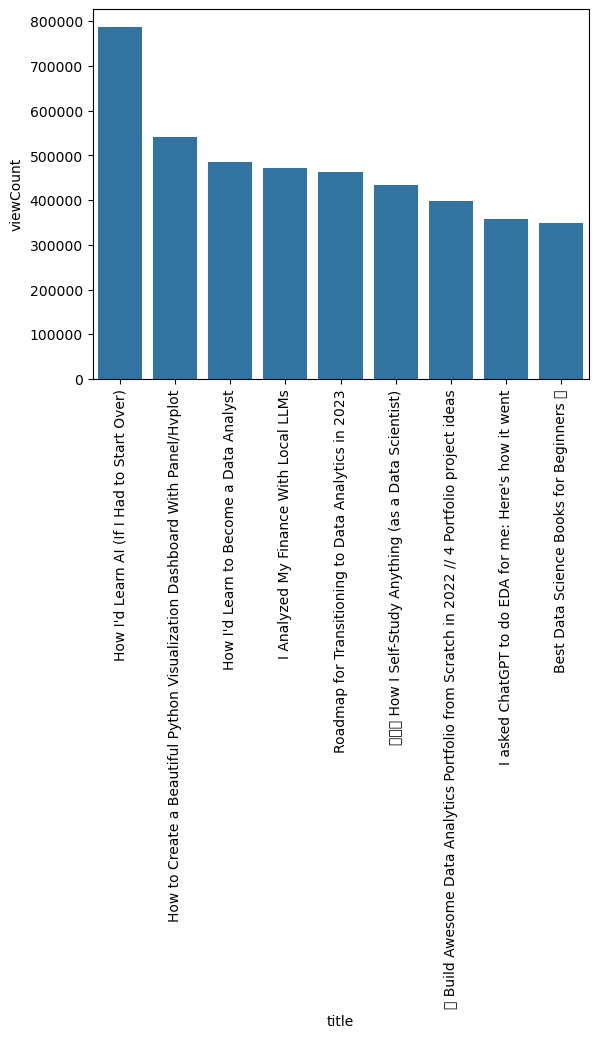

In [43]:
#Best performing videos 
sorted_video_df = video_df.sort_values('viewCount', ascending=False).iloc[0:9]
ax = sns.barplot(x='title', y='viewCount', data=sorted_video_df)
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FunctionFormatter(lambda x, pos: '{,.0f}'.format(x/1000) + 'K'))

C:\Users\stale\AppData\Local\Temp\ipykernel_13356\171811544.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\stale\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128105 (\N{WOMAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\stale\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  func(*args, **kwargs)
C:\Users\stale\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128105 (\N{WOMAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\stale\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


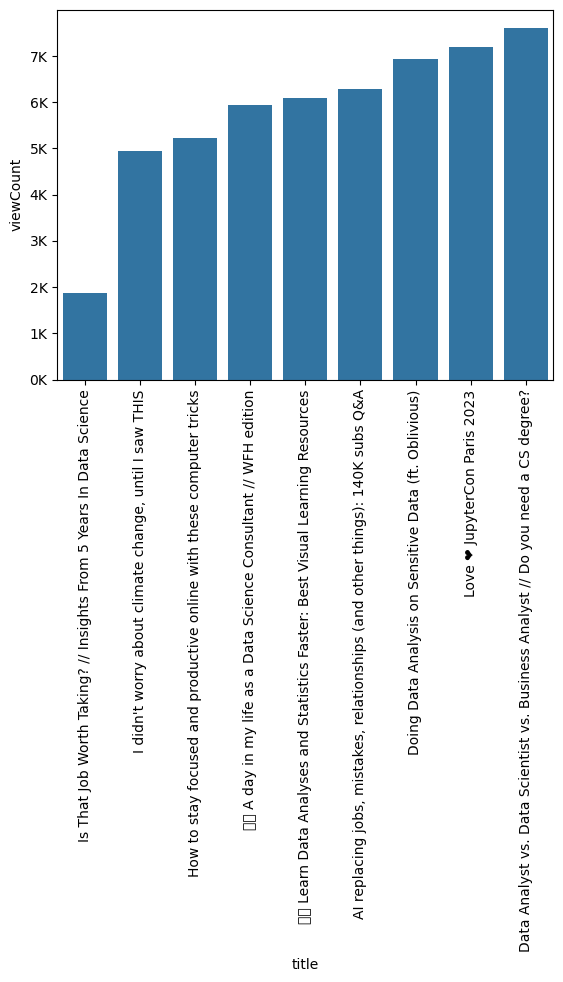

In [44]:
#Worst perofming videos 
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

In [ ]:
##Video distribution per video 

<Axes: xlabel='channelTitle', ylabel='viewCount'>

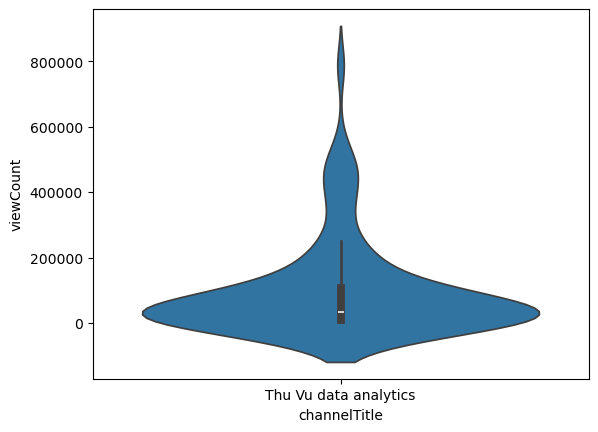

In [45]:
sns.violinplot(x='channelTitle', y='viewCount', data=video_df)

In [ ]:
##Views vs. Likes and Comments

<Axes: xlabel='likeCount', ylabel='viewCount'>

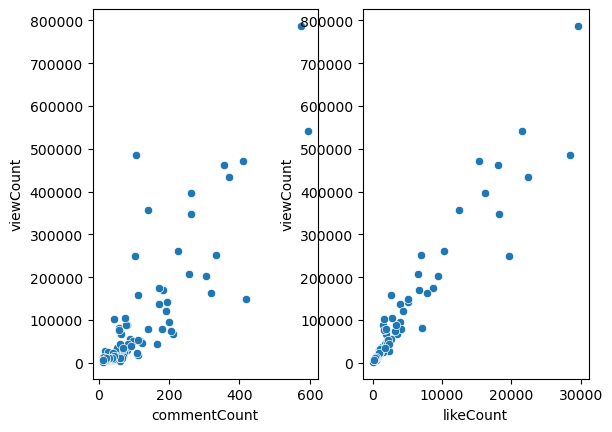

In [46]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

In [ ]:
##Video duration

<Axes: xlabel='durationSecs', ylabel='Count'>

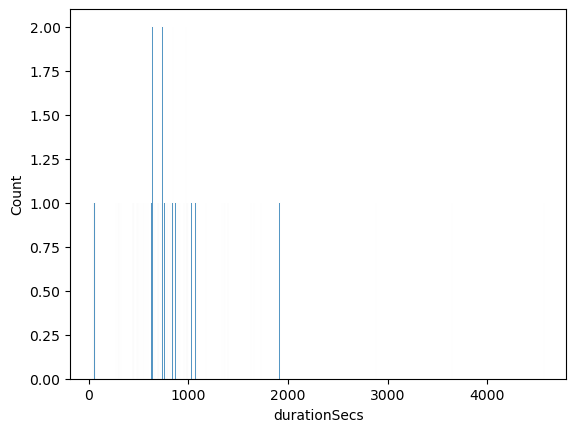

In [47]:
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

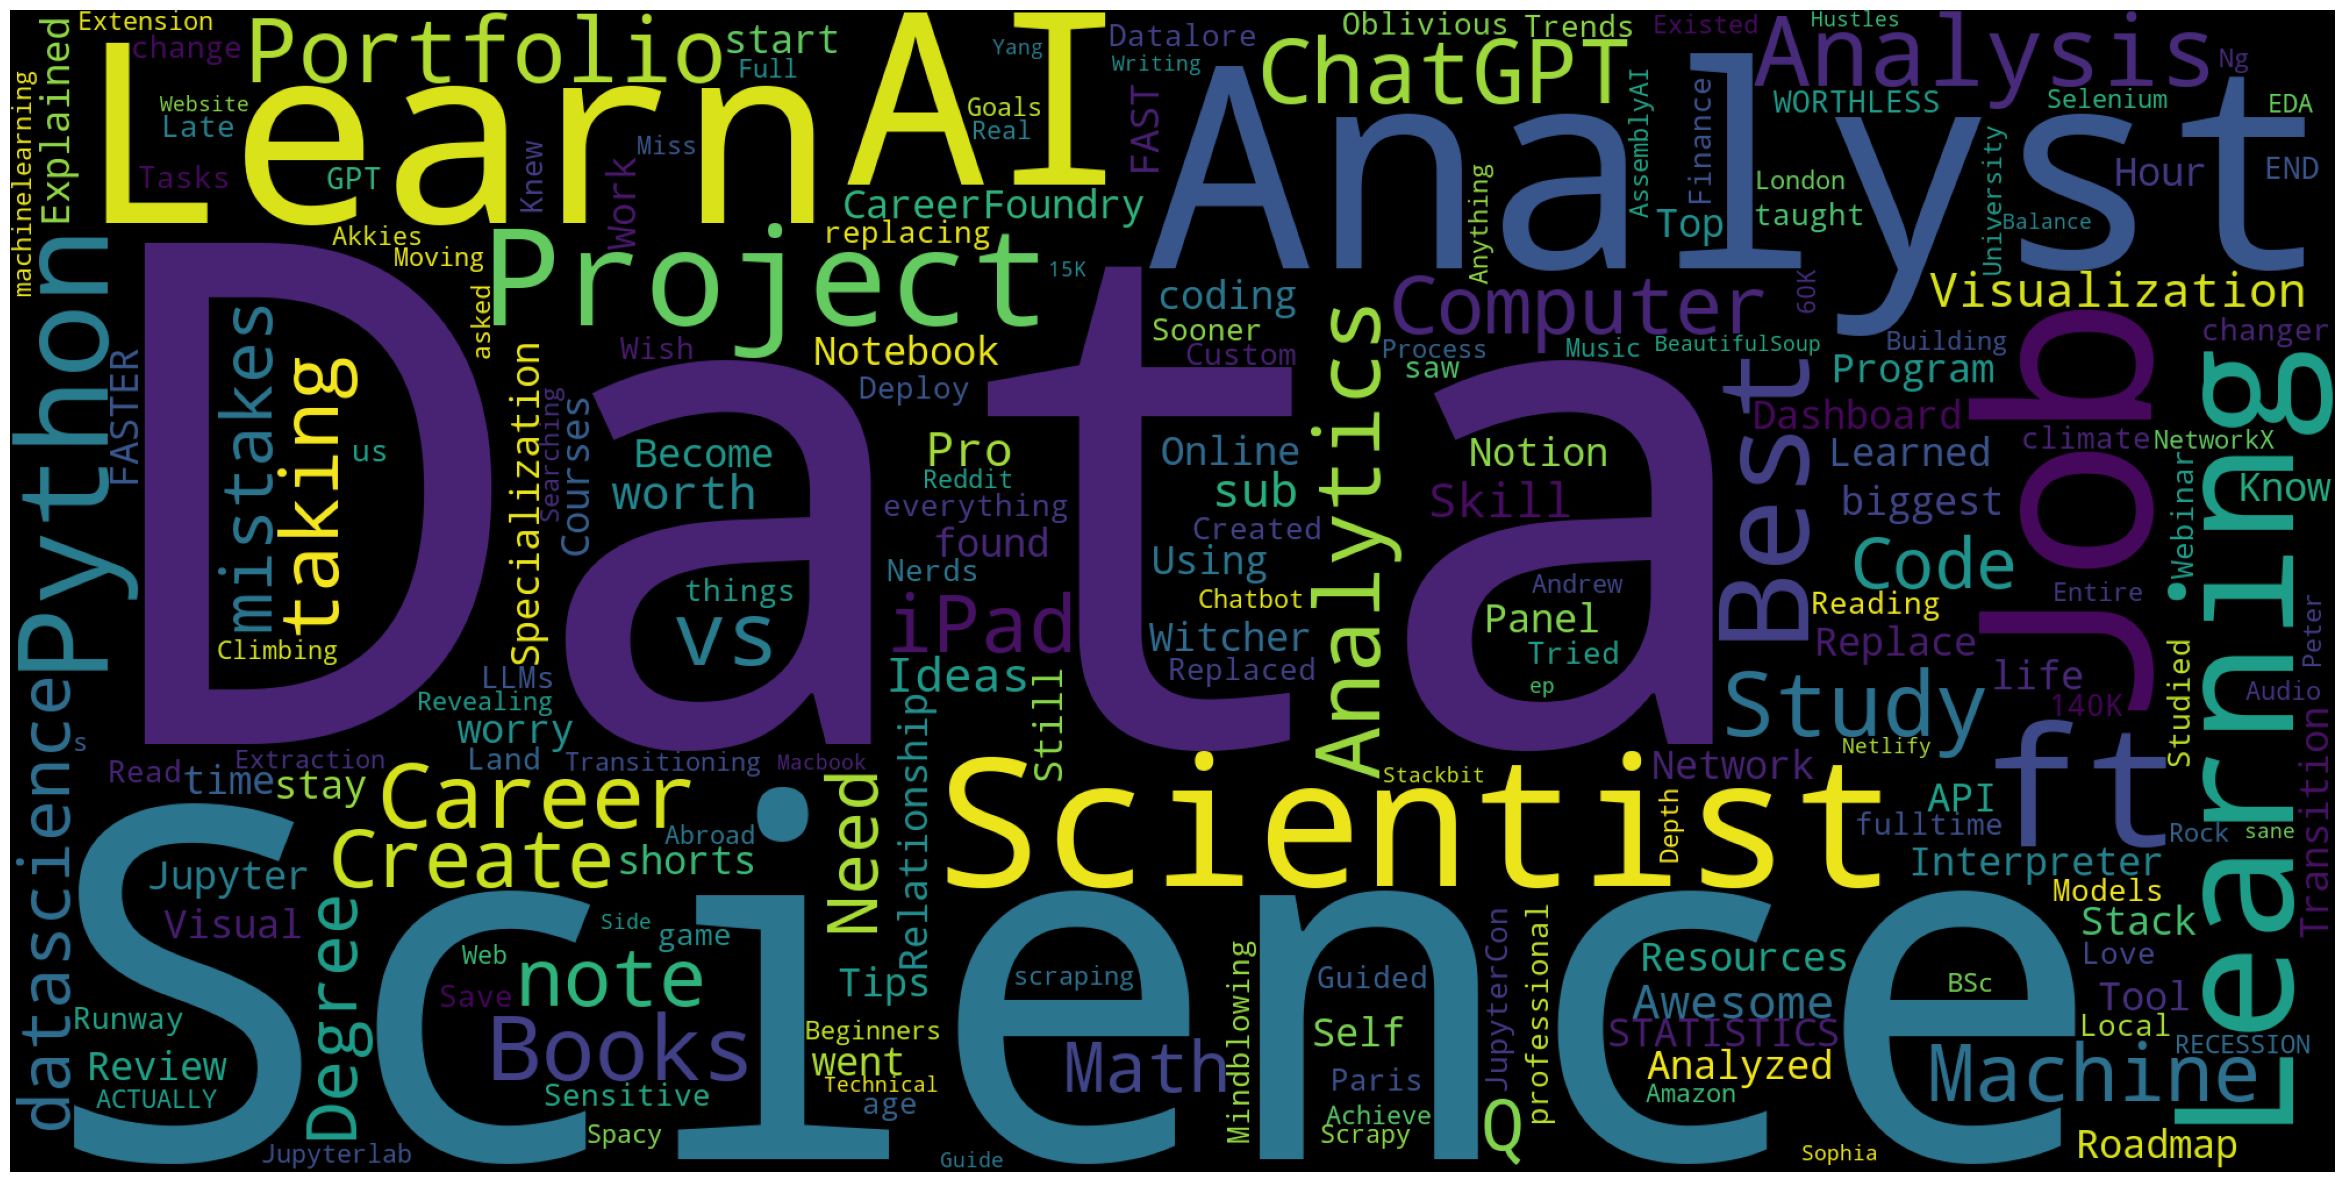

In [48]:
##Wordcloud for video titles

stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item.lower() not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                     colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

In [ ]:
#Upload Schedule

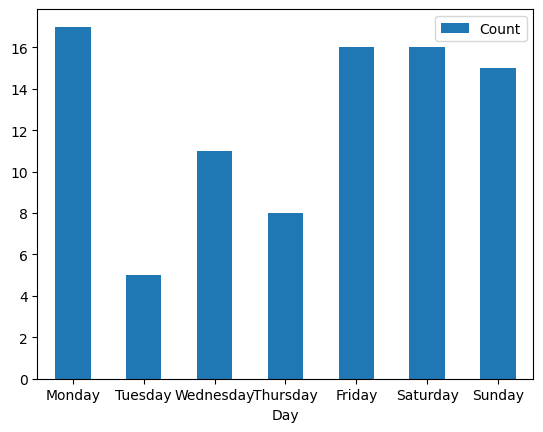

In [49]:
day_df = pd.DataFrame(video_df['publishDayName'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
day_df = day_df.reset_index()
day_df.columns = ['Day', 'Count']
ax = day_df.plot.bar(x='Day', y='Count', rot=0)